In [1]:
import numpy as np
import healpy as hp
from healpy.newvisufunc import projview
from astropy.table import Table

import matplotlib
from matplotlib import pyplot as plt

In [12]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['legend.fontsize'] = 18

matplotlib.rc('text', usetex=True)

In [2]:
cmap_map = 'plasma'

## Parameters

In [5]:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)

In [6]:
name_catalog = '\emph{{Gaia}}-\emph{{unWISE}} Quasar Catalog'
abbrv_catalog = 'Quaia'

In [7]:
G_hi = 20.5
G_lo = 20.0

In [8]:
# for plotting purposes
fac_stdev = 1.5

## Loading

In [3]:
fn_gcathi = '../data/quaia_G20.5_mini_cosmohub.fits'

In [4]:
tab_gcathi = Table.read(fn_gcathi)
N_gcathi = len(tab_gcathi)
print(f"Number of data sources: {N_gcathi}")

Number of data sources: 1295502


### Make map of quasar number counts

In [10]:
pixel_indices_gcathi = hp.ang2pix(NSIDE, tab_gcathi['ra'], tab_gcathi['dec'], lonlat=True)
map_gcathi = np.bincount(pixel_indices_gcathi, minlength=NPIX)

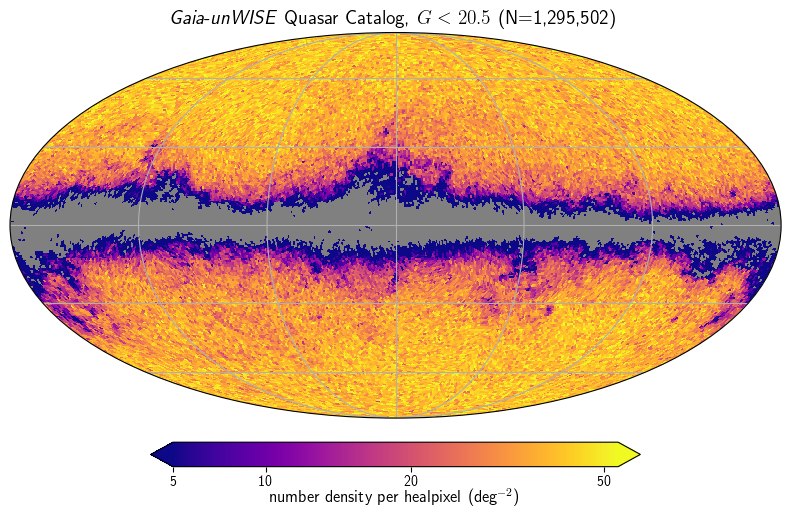

In [13]:
title_gcathi = rf"{name_catalog}, $G<{G_hi}$ (N={len(tab_gcathi):,})"
projview(map_gcathi, title=title_gcathi,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_gcathi)-fac_stdev*np.std(map_gcathi), max=np.median(map_gcathi)+fac_stdev*np.std(map_gcathi), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20, 50]) 

# Redshift distribution

Text(0, 0.5, 'number per bin')

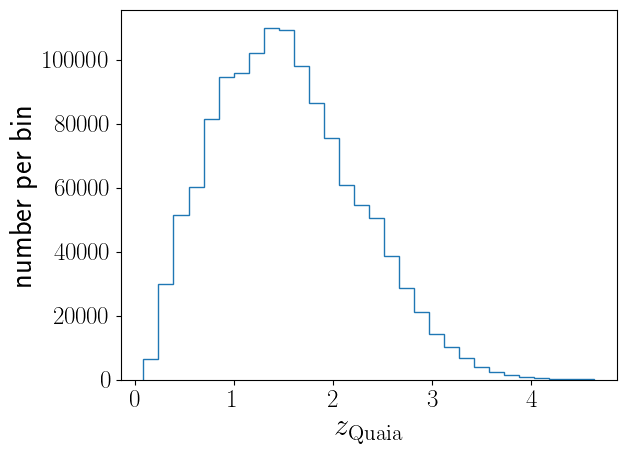

In [16]:
plt.hist(tab_gcathi['redshift_quaia'], bins=30, histtype='step')
plt.xlabel(r'$z_\mathrm{Quaia}$')
plt.ylabel('number per bin')